# <font color= "red"> Machine learning Project: Master2 Quantitative Finance
# Students: 
>## Aymen Fathallah
>##           Mohamed Ali Boussaidi

## I. Import basic libraries

In [220]:
from sklearn import datasets
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [175]:
import matplotlib
plt.style.use('default')
plt.rcParams["figure.figsize"] = (7,7)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['agg.path.chunksize'] = 10000

# II. Load the dataset 

In [123]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
obs = X[10,:]
label=y[10]
image = np.array(obs, dtype='uint8').reshape(8,8)

In [208]:
n1 = 5
n2 = 9

In [209]:
data = np.concatenate((X[y == n1], X[y == n2]))

In [210]:
digits.target[digits.target == n1]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

In [211]:
output = np.concatenate((digits.target[digits.target == n1], digits.target[digits.target == n2]))

In [212]:
n_samples = len(data)
n_samples

362

In [213]:
data = data.reshape((n_samples,-1))

In [214]:
X_train, X_test, y_train, y_test = train_test_split(
    data, output, test_size=0.3, random_state = 42)

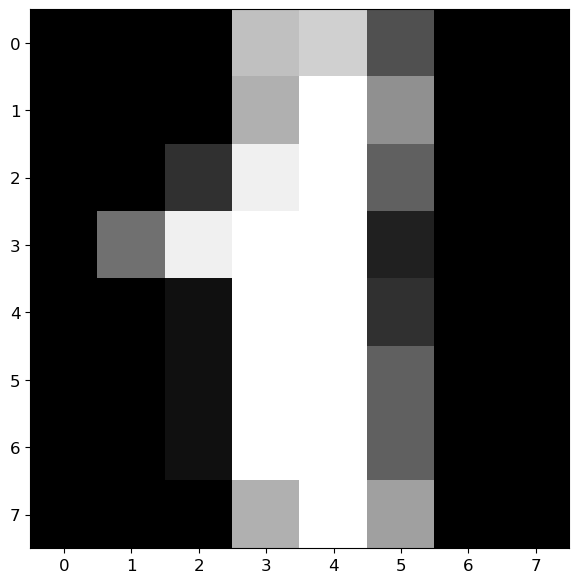

In [215]:
plt.imshow(np.array(X[y == 1][0], dtype='uint8').reshape(8,8), cmap='gray')

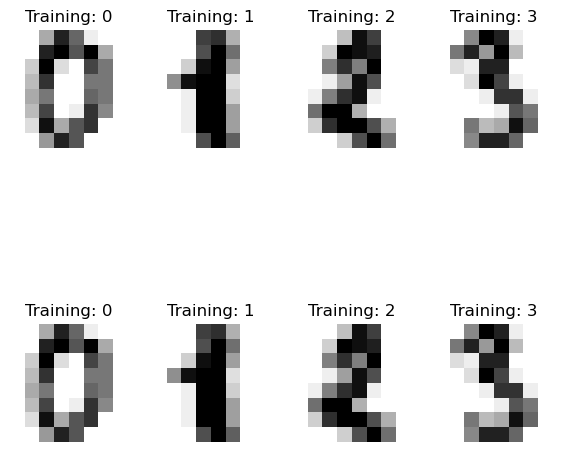

In [216]:
figure, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
k = 0
while k<2:
    for ax, (image, label) in zip(axes[k, :], images_and_labels[:]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Training: %i' % label)
    k+=1

As machine learning model we are working with take as imputs vectors, so we need to flatten the image, to turn the data in a (samples, feature) matrix:

## K nearest neighbors

In [224]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           5       1.00      1.00      1.00        56
           9       1.00      1.00      1.00        53

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109


Confusion matrix:
[[56  0]
 [ 0 53]]


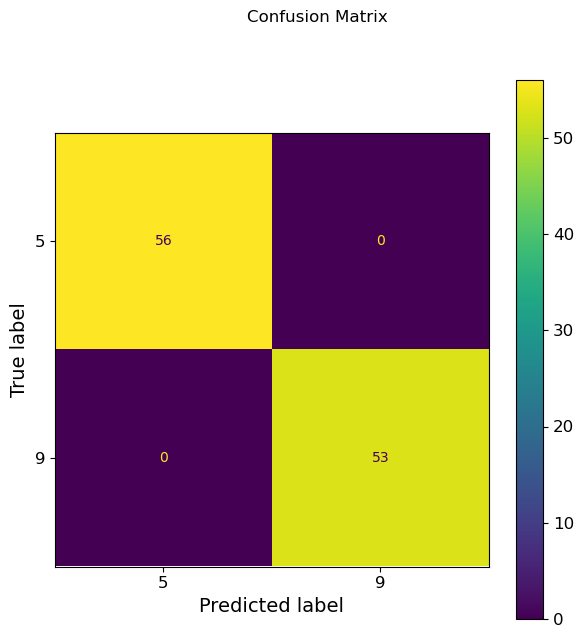

In [225]:
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, pred_knn)))
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

## Logistic regression

In [192]:
LGR = LogisticRegression()
LGR.fit(X_train, y_train)
predict_LGR = LGR.predict(X_test)

In [193]:
predict_LGR

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        56

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Confusion matrix:
[[52  0]
 [ 0 56]]


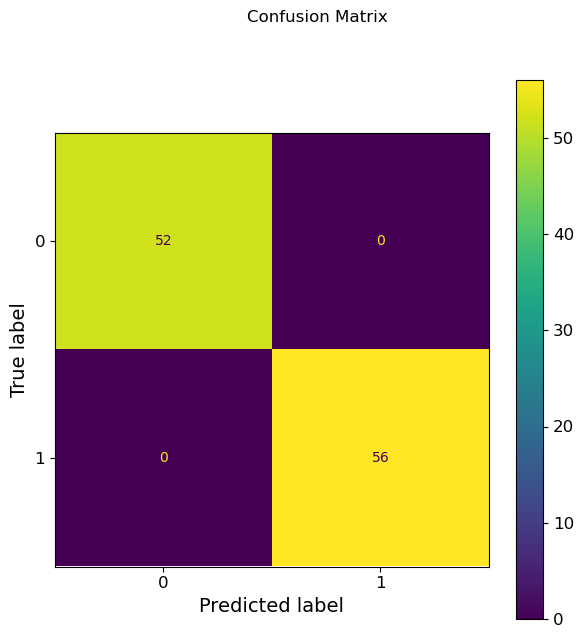

In [194]:
print("Classification report for classifier %s:\n%s\n"
      % (LGR, metrics.classification_report(y_test, predict_LGR)))
disp = metrics.plot_confusion_matrix(LGR, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

## SVM Classifier

In [195]:
Classifier_svm = svm.SVC()
Classifier_svm.fit(X_train, y_train) #fit the model
# Now predict the value of the digit on the test data
predicted = Classifier_svm.predict(X_test)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        56

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Confusion matrix:
[[52  0]
 [ 0 56]]


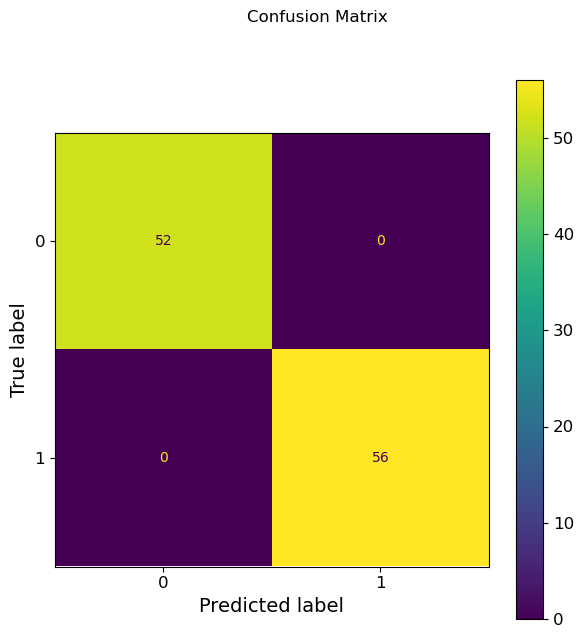

In [196]:
print("Classification report for classifier %s:\n%s\n"
      % (Classifier_svm, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(Classifier_svm, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [197]:
scores = cross_val_score(Classifier_svm, X_train, y_train, cv=5)
scores

array([1., 1., 1., 1., 1.])

## Decision tree classifier

In [198]:
Classifier_DT = DecisionTreeClassifier()
Classifier_DT.fit(X_train,y_train)
prediction_DT = Classifier_DT.predict(X_test)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        56

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Confusion matrix:
[[52  0]
 [ 0 56]]


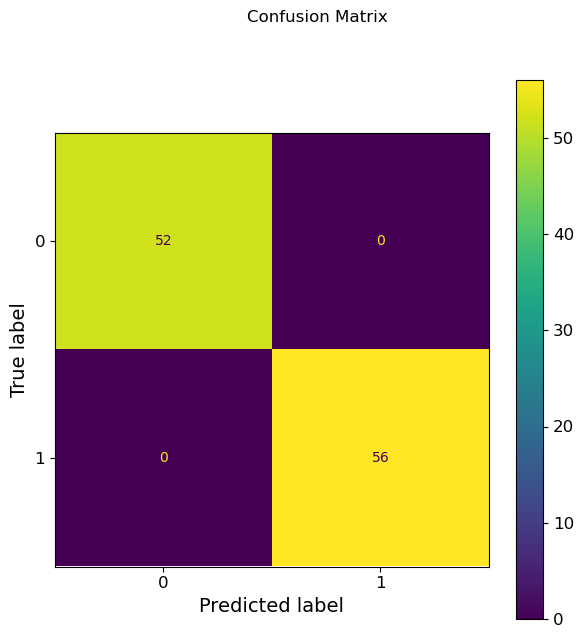

In [199]:
print("Classification report for classifier %s:\n%s\n"
      % (Classifier_DT, metrics.classification_report(y_test, prediction_DT)))
disp = metrics.plot_confusion_matrix(Classifier_DT, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [200]:
scores = cross_val_score(Classifier_DT, X_train, y_train, cv=5)
scores

array([1.        , 0.98039216, 1.        , 1.        , 1.        ])

## RANDOM FOREST CLASSIFIER

In [201]:
Classifier_RDMF = RandomForestClassifier(max_depth = 2)
Classifier_RDMF.fit(X_train,y_train)
prediction_RDMF = Classifier_RDMF.predict(X_test)

Classification report for classifier RandomForestClassifier(max_depth=2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        56

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Confusion matrix:
[[52  0]
 [ 0 56]]


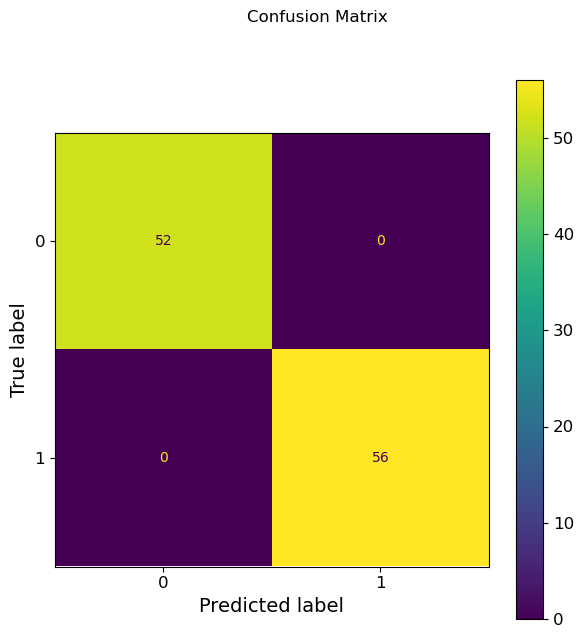

In [202]:
print("Classification report for classifier %s:\n%s\n"
      % (Classifier_RDMF, metrics.classification_report(y_test, prediction_RDMF)))
disp = metrics.plot_confusion_matrix(Classifier_RDMF, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

## Adaboost Classifier

In [203]:
Classifier_Ada = AdaBoostClassifier(Classifier_DT, n_estimators=60, learning_rate=1.0, algorithm='SAMME', 
                         random_state=None)
Classifier_Ada.fit(X_train, y_train)
prediction_Ada = Classifier_Ada.predict(X_test)

Classification report for classifier AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   n_estimators=60):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        56

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Confusion matrix:
[[52  0]
 [ 0 56]]


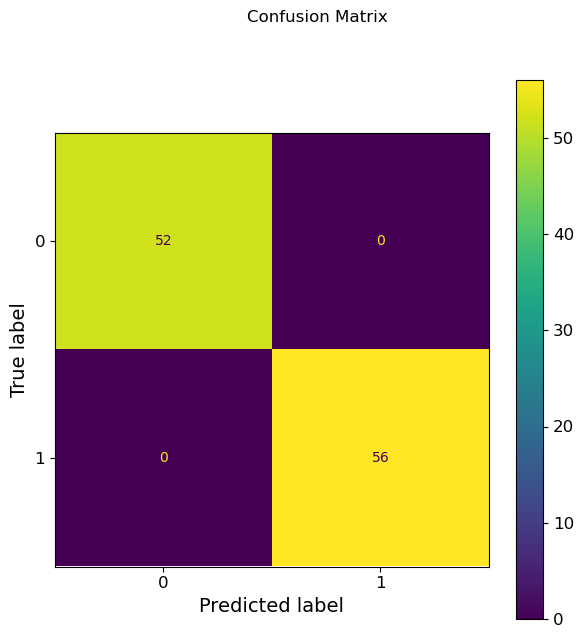

In [204]:
print("Classification report for classifier %s:\n%s\n"
      % (Classifier_Ada, metrics.classification_report(y_test, prediction_Ada)))
disp = metrics.plot_confusion_matrix(Classifier_Ada, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

Here we build the adaboost classifier on the decision tree classifier.

In [205]:
scores = cross_val_score(Classifier_Ada, X_train, y_train, cv=5)
scores

array([1.        , 0.96078431, 1.        , 0.98      , 1.        ])

## LightGBM Classifier

In [206]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(objective='binary', random_state=5)
lgbm.fit(X_train, y_train)
prediction_lgbm = lgbm.predict(X_test)

Classification report for classifier AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   n_estimators=60):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        56

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Confusion matrix:
[[52  0]
 [ 0 56]]


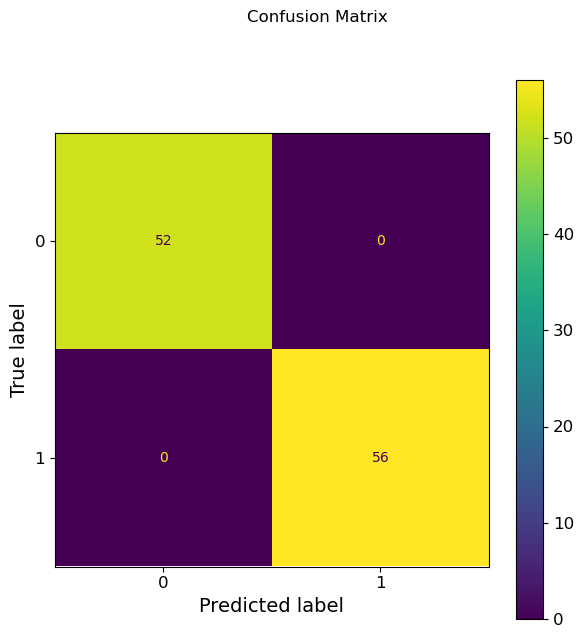

In [207]:
print("Classification report for classifier %s:\n%s\n"
      % (Classifier_Ada, metrics.classification_report(y_test, prediction_Ada)))
disp = metrics.plot_confusion_matrix(Classifier_Ada, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [6]:
%load_ext watermark

%watermark -v -m -p  sklearn,sklearn.tree,sklearn.ensemble,sklearn.linear_model,sklearn.neighbors,matplotlib.pyplot,numpy,sklearn.model_selection


print(" ")

%watermark -u -n -t -z

CPython 3.8.3
IPython 7.16.1

sklearn 0.0
sklearn.tree 0.23.1
sklearn.ensemble 0.23.1
sklearn.linear_model 0.23.1
sklearn.neighbors 0.23.1
matplotlib.pyplot 3.2.2
numpy 1.18.5
sklearn.model_selection 0.23.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit
 
last updated: Sun Nov 01 2020 11:46:24 Romance Standard Time
